<p style="text-align:center">
PSY 394U <b>Data Analytics with Python</b>, Spring 2018


<img style="width: 400px; padding: 0px;" src="https://github.com/sathayas/JupyterAnalyticsSpring2018/blob/master/images/Title_pics.png?raw=true" alt="title pics"/>

</p>

<p style="text-align:center; font-size:40px; margin-bottom: 30px;"><b> Support vector machine (SVM) </b></p>

<p style="text-align:center; font-size:18px; margin-bottom: 32px;"><b>February 15, 2018</b></p>

<hr style="height:5px;border:none" />

# 1. What is a support vector machine?
<hr style="height:1px;border:none" />

## The line must be drawn here

Let's say, you have two clusters of data points that are separated from each other. 

In [1]:
%matplotlib inline

`<SVM_2Clusters.py>`

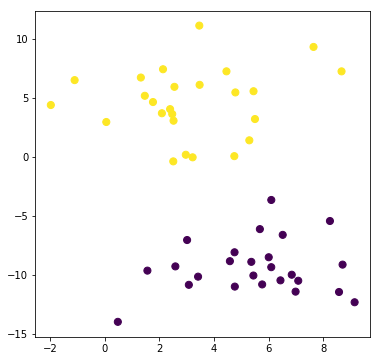

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


# producing a toy data set: two clusters, separated
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=10, cluster_std=2.5)


# plotting the toy data
plt.figure(figsize=[6,6])
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plt.show()

Now, you want to draw a boundary between the two clusters, so that any future observations can be classified by which side of the boundary they lie. You can draw many possible boundaries, for example.

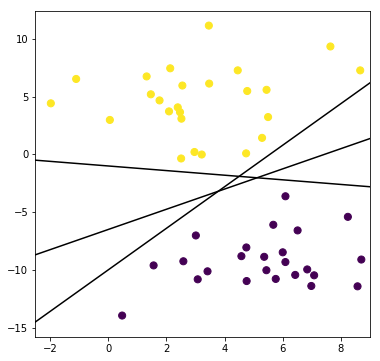

In [3]:
# plotting possible boundaries
xMin = -2.5
xMax = 9.0
xfit = np.linspace(xMin, xMax)
plt.figure(figsize=[6,6])
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
for m, b in [(0.875, -6.5), (-0.2, -1), (1.8, -10)]:
    plt.plot(xfit, m * xfit + b, '-k')
plt.xlim(xMin, xMax)
plt.show()

Now, which one is the most appropriate in this case? We can use a criterion that the boundary must separate the two clusters the most. In other words, the distance between the observations and the boundary must be maximized.

In our example, let's examine the distance between the boundary and the data point closest to the boundary, known as the **margin**.

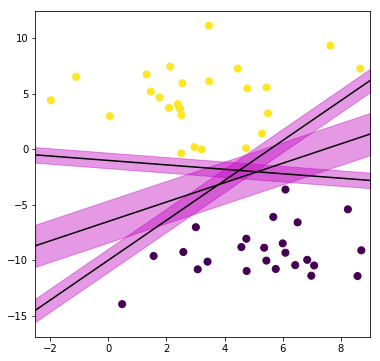

In [4]:
# plotting possible boundaries with margins
plt.figure(figsize=[6,6])
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
for m, b, d in [(0.875, -6.5, 1.9), (-0.2, -1, 0.7), (1.8, -10, 1.05)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, 'k-')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='m', alpha=0.4)
plt.xlim(xMin, xMax)
plt.show()

As you notice, the margin is different between the different boundaries. The goal of the **support vector machine** **(SVM)** algorithm is to find the boundary that maximizes the margin.

## SVM, a simple example

The SVM algorithm is implemented in **`sklearn.svm`** as the **`SVC`** transformation object. Here is how we can use the `SVC` object.

In [5]:
# SVM
sv = SVC(kernel='linear', C=10000)
sv.fit(X,y)

SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Here, we define the `SVC` object with two parameters. The parameter **`kernel='linear'`** defines that the boundary is a line (thus *linear*). The parameter **`C=10000`** defines the penalty for the error term. We will explore this `C` parameter later. Once the `SVC` object is defined, then we use the **`.fit`** method to fit the data (features and targets) to run the SVM algorithm. Here is the result.

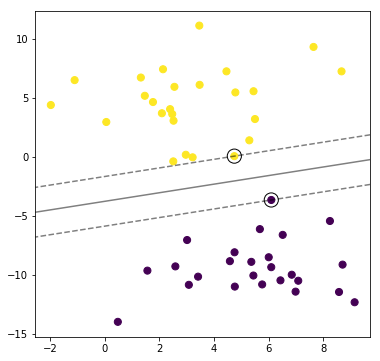

In [6]:
# plotting the descision boundary with SVM, with margins
# as well as support vectors
plt.figure(figsize=[6,6])
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

# suppor for the meshgrid
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = sv.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# plot support vectors
ax.scatter(sv.support_vectors_[:, 0], sv.support_vectors_[:, 1], s=200,
           linewidth=1, edgecolors='k', facecolors='none')

plt.show()

You don't have to worry about the code to produce this plot. Here, the line indicates the boundary, and the dotted lines indicate the margin. The closest points on both sides of the boundary are circled. These points are called **support vectors** (SV) (the namesake of the SVM algorithm). These boundaries are pivotal in defining the boundary. In fact, these are the only points needed to define the boundary.

You can examine the coordinates of these support vectors by the **`.support_vectors_`** of the SVM object. The coordinate for the first SV is

In [7]:
# coordinate for the first SV
print(sv.support_vectors_[0,:])

[ 6.09158828 -3.62254269]


It looks like this SV belongs to the purple cluster. The coordinate for the second SV is

In [8]:
# coordinate for the second SV
print(sv.support_vectors_[1,:])

[ 4.74046126  0.08979735]


And this belongs to the yellow cluster.

## SVM classifier

Of course, the point of finding the boundary is so that we can use it to classify observations. To demonstrate, we split the toy data into a training and testing data sets. The testing data contains 10 observations (as specified by **`test_size=10`**).

In [9]:
# split the toy data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=10, 
                                                    random_state=0)

Now let's run SVM on the training data. As in other classifiers you have seen before, you can use the **`.predict`** method with the testing data to produce predicted class labels.

In [10]:
# SVM fitting
sv_train = SVC(kernel='linear', C=10000)
sv_train.fit(X_train,y_train)

# SVM classifier
y_pred = sv_train.predict(X_test)

And finally, let's see the classification results.

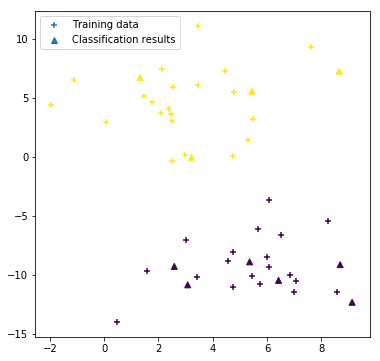

In [11]:
# plotting the training data and classification outcome
plt.figure(figsize=[6,6])
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='+',
            label='Training data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, marker='^',
            label='Classification results')
plt.legend()
plt.show()

Since these are well-separated clusters, we had a pretty good classification outcome.

# 2. Hard and soft margins
<hr style="height:1px;border:none" />

Now let's consider a case where two clusters are not clearly separated, but have some overlap.

`<SVM_SoftMargins.py>`

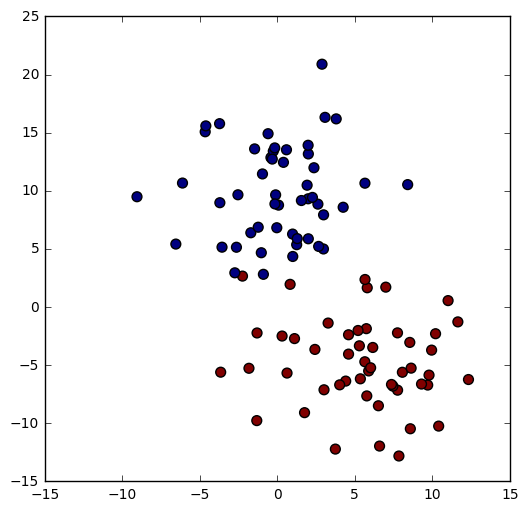

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC


def plot_svm_margin(X,y,sv):
    '''
    Input:
         X:  2D data matrix
         y:  Target vector
         sv: Support vector machine results
    Returns:
         None
    Produces:
         A scatter plot of the data X, with colors defined by y.
         SVM boundary, as well as the margin is plotted. Also
         support vectors are indicated.

         You need to run plt.show() after everything is done.
    '''
    # scatter plot first
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

    # suppor for the meshgrid
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = sv.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    ax.scatter(sv.support_vectors_[:, 0], sv.support_vectors_[:, 1], s=200,
               linewidth=1, edgecolors='k', facecolors='none')


# producing a toy data set: two clusters, with some overlap
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=23, cluster_std=3.75)


# plotting the toy data
plt.figure(figsize=[6,6])
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plt.show()


(Here, don't worry about the function `plot_svm_margin`.) As you can see, the two clusters are touching a little bit. In a case like this, a simple line cannot separate the two clusters without some misclassification. The parameter **`C`** mentioned earlier controls how much such misclassification you allow. In other words, how many observations may lie within the classification margin. A large value of **`C`** permits fewer observations in the margin (referred as a **hard margin**), whereas a smaller value of `C` allows many observations to lie within the margin (referred as a **soft margin**). In other words, `C` controls how hard or soft the margin is. Here are examples of SVM with different values of `C` (large:**`C=10`**, medium:**`C=1.0`**(default in SVC), small:**`C=0.1`**, and tiny:**`C=0.01`**).

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/ma/core.py:6434: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/ma/core.py:6434: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


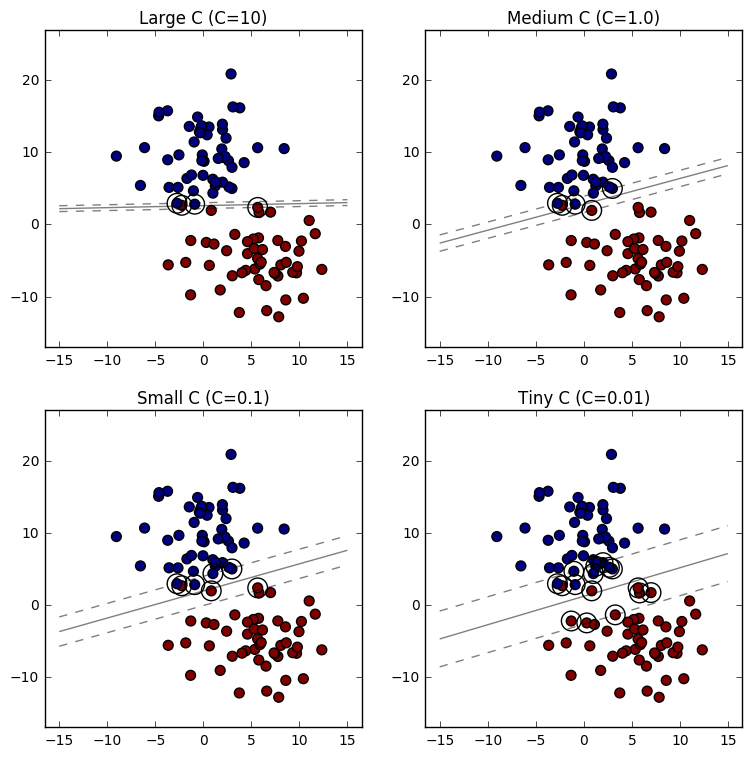

In [3]:
# SVM
plt.figure(figsize=[9,9])

svL = SVC(kernel='linear', C=10)  # large C (C=10)
svL.fit(X,y)
plt.subplot(221)
plot_svm_margin(X,y,svL)
plt.title('Large C (C=10)')

svM = SVC(kernel='linear', C=1.0)  # medium C (C=1.0)
svM.fit(X,y)
plt.subplot(222)
plot_svm_margin(X,y,svM)
plt.title('Medium C (C=1.0)')

svS = SVC(kernel='linear', C=0.1)  # small C (C=0.1)
svS.fit(X,y)
plt.subplot(223)
plot_svm_margin(X,y,svS)
plt.title('Small C (C=0.1)')

svT = SVC(kernel='linear', C=0.01)  # tiny C (C=0.01)
svT.fit(X,y)
plt.subplot(224)
plot_svm_margin(X,y,svT)
plt.title('Tiny C (C=0.01)')

plt.show()

As you can see, the larger the parameter `C`, the fewer the number of support vectors lying within the margin. And vice versa. 

So, how do we determine the value of `C` that works for your data? We do so by fitting different training data sets repeatedly and evaluate the classifier performance, the process known as *cross validation*. We will cover cross validation later in the semester.

# 3. Example: cryotherapy data
<hr style="height:1px;border:none" />

Recall the cryotherapy data from the [logistc regression](https://github.com/sathayas/JupyterAnalyticsSpring2018/blob/master/Logistic.ipynb) lecture. Some features are highly associated with the success of the cryotherapy. We will focus on continuous features, **`Age`**, **`Time`**, and **`Area`**.

First, we plot these features and see if the two classes of the outcome (success: **`Success=1`** (**green**) or failure: **`Success=0`** (**red**)).

`<CryoSVM.py>`

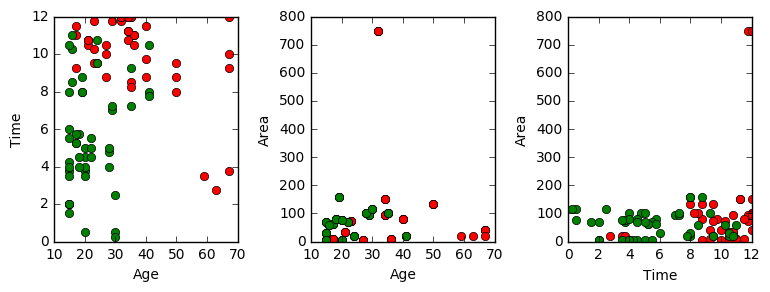

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


# loading the data
CryoData = pd.read_csv('Cryotherapy.csv')

# plotting the Age, Time, and Area
plt.figure(figsize=[9,3])
pColor = ['r','g']
plt.subplot(131)
for i in range(2):
    plt.plot(CryoData[CryoData.Success==i].Age,
             CryoData[CryoData.Success==i].Time,
             marker='o',ls='none',c=pColor[i])
plt.xlabel('Age')
plt.ylabel('Time')

plt.subplot(132)
for i in range(2):
    plt.plot(CryoData[CryoData.Success==i].Age,
             CryoData[CryoData.Success==i].Area,
             marker='o',ls='none',c=pColor[i])
plt.xlabel('Age')
plt.ylabel('Area')

plt.subplot(133)
for i in range(2):
    plt.plot(CryoData[CryoData.Success==i].Time,
             CryoData[CryoData.Success==i].Area,
             marker='o',ls='none',c=pColor[i])
plt.xlabel('Time')
plt.ylabel('Area')

plt.subplots_adjust(wspace=0.4, bottom=0.15)
plt.show()


Notice that there are some outlying observations in **`Area`**. However, as long as these observations are not selected as support vectors (i.e., sufficiently distant from the boundary), such observations do not affect the SVM classifier.

### Exercise
1. **Cryotherapy SVM, training and testing data**. Here we will focus on only the three features mentioned above: `Age`, `Time`, and `Area`. Split the data set into training and testing data sets, with the testing data set comprising 30% of observations. ***NB:*** *First you need to create a data set comprising the three features only.*
2. **Cryotherapy SVM, fitting and classification**. Fit the training data set to an SVM. Use **`C=1.0`**. Then classify the testing data set. Evaluate the performance of the classifier by a confusion matrix and a classification report.

In [5]:
### Example solution for Exercise 1
# Creating the data set
X = np.array(CryoData.loc[:,['Age','Time','Area']])
y = np.array(CryoData.Success)

# Creating the training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=0)


# 4. Multi-class SVM
<hr style="height:1px;border:none" />

The concept of SVM makes sense for a binary classification problem. But what if there are more than 2 classes in the target? In that case, we can take two approaches:

  * **One-versus-rest (OVR)**: In this approach, each class is compared to the rest of classes in a separate SVM. Then the predicted class label is based on the class that gives the largest distance from the boundary. 
  * **One-versus-one (OVO)**: In this approach, all possible pairs of classes are compared with a 2-class SVM. For each observation, we count the number of times that observation has been classified to a particular class. The class with the most *vote* is selected as the predicted class.
  
By default, `SVC` uses the OVR approach, so we will use it for our subsequent analyses.

## Toy example: 3 clusters

For this example, there are 3 clusters with some overlapping observations. Let's plot those clusters. 

*(Here, please ignore functions `make_meshgrid` and `plot_countours`; those are functions used to visualize the decision boundaries)*

`<SVM_3Clusters.py>`

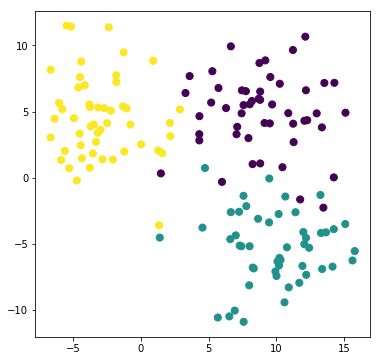

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, x, y, h=.02, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional
    params: dictionary of params to pass to contourf, optional
    """
    xx, yy = make_meshgrid(x, y, h)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out




# producing a toy data set: three clusters, touching
X, y = make_blobs(n_samples=150, centers=3,
                  random_state=24, cluster_std=3.0)


# plotting the toy data
plt.figure(figsize=[6,6])
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plt.show()

There are 150 data points in this data set. Now let's split this into the training and testing data sets, with the testing data set comprising 50 observations.

In [3]:
# spliting the data into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=50, 
                                                    random_state=0)

Then we fit the training data to a SVM to generate a classifier to be used later. Here, we use the linear kernel with **`C=1.0`**.

In [4]:
# SVM model fitting
sv = SVC(kernel='linear', C=1.0)
sv.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Let's take a look at the decision boundaries resulting from this SVM, as well as the training data set.

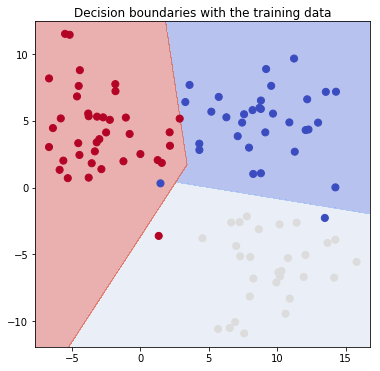

In [5]:
# plotting the decision boundaries from the SVM
plt.figure(figsize=[6,6])
ax = plt.subplot(111)
plot_contours(ax, sv, X_train[:, 0], X_train[:, 1],
                  cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, 
            s=50, cmap=plt.cm.coolwarm)
plt.title('Decision boundaries with the training data')
plt.show()

Then we will classify the testing data. 

In [7]:
# SVM classifier
y_pred = sv.predict(X_test)   # predicted class
y_margin = sv.decision_function(X_test)  # margins to boundaries

We will examine the margin, the distance between each observation to the boundary for each class. The margin is available in the **`decision_function`** attribute of the SVC object. There are 3 different classes in this example, so there are 3 different boundaries. Thus each observation has 3 margins to those boundaries.

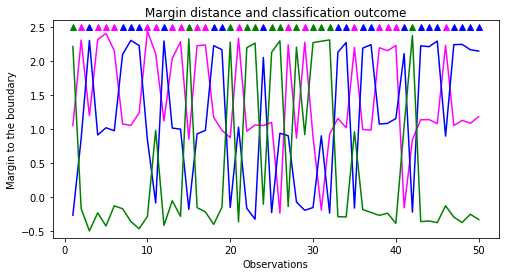

In [8]:
# plotting the margins for different classes 
targetColors = ['magenta', 'blue', 'green']
obsVec = np.arange(1,len(y_margin)+1)
plt.figure(figsize=[8,4])
for iClass in range(3):
    plt.plot(obsVec,y_margin[:,iClass], 
             ls='-', c=targetColors[iClass])
    plt.plot(obsVec[y_pred==iClass],2.5*np.ones_like(obsVec[y_pred==iClass]),
             marker = '^', ls='none', c=targetColors[iClass])
plt.ylim([-0.6, 2.6])
plt.xlabel('Observations')
plt.ylabel('Margin to the boundary')
plt.title('Margin distance and classification outcome')
plt.show()


As you can see, the class yielding the largest margin is chosen at the predicted class for each observation.

Here are the decision boundaries, as well as the testing data set. The color for each observation corresponds to the true class, whereas the location determines to which class that observation is classified.

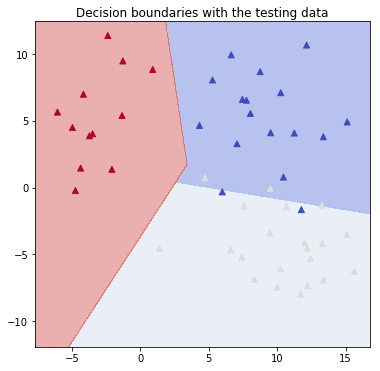

In [9]:
# plotting the boundaries and the testing data
plt.figure(figsize=[6,6])
ax = plt.subplot(111)
plot_contours(ax, sv, X[:, 0], X[:, 1],
                  cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X_test[:,0], X_test[:,1],
            marker = '^', c=y_test,
            cmap=plt.cm.coolwarm)
plt.title('Decision boundaries with the testing data')
plt.show()


As you can see, there are a few observations misclassified. We can examine the classification results with a confusion matrix.

In [10]:
# Confusion matrix
print(confusion_matrix(y_test,y_pred))

[[15  2  0]
 [ 3 18  0]
 [ 0  0 12]]


And the classification report.

In [11]:
# classification report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.83      0.88      0.86        17
          1       0.90      0.86      0.88        21
          2       1.00      1.00      1.00        12

avg / total       0.90      0.90      0.90        50



## Example: iris data

As you recall, there are 3 classes in the iris data. While one of the classes (Setosa) is separated well from the other classes, the remaining two classes are somewhat overlapping.

`<IrisSVM.py>`

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Loading the iris data
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

### Exercise
1. **Iris data SVM, training data**. Split the iris data into the training and testing data sets, with the testing data set comprising 50 observations. Then fit the training data to an SVM, with a linear kernel and `C=1.0`.
2. **Iris data SVM, testing data**. Using the SVM classifier generated from the previous step, classify the testing data set. Examine the classification performance by a confusion matrix and a classification report.

# 5. Kernel methods
<hr style="height:1px;border:none" />

The SVMs we have seen so far work well if boundaries are defined as straight lines. But let's consider this case.

`<SVM_Circles.py>`

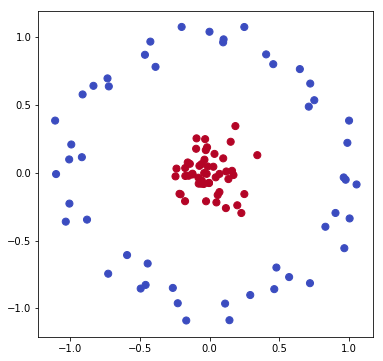

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_circles
from sklearn.svm import SVC

def plot_svm_margin(X,y,sv):
    '''
    Input:
         X:  2D data matrix
         y:  Target vector
         sv: Support vector machine results
    Returns:
         None
    Produces:
         A scatter plot of the data X, with colors defined by y.
         SVM boundary, as well as the margin is plotted. Also
         support vectors are indicated.

         You need to run plt.show() after everything is done.
    '''
    # scatter plot first
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.coolwarm)
    # suppor for the meshgrid
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = sv.decision_function(xy).reshape(XX.shape)
    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(sv.support_vectors_[:, 0], sv.support_vectors_[:, 1], s=200,
               linewidth=1, edgecolors='k', facecolors='none')


# Creating a toy data with circles
X, y = make_circles(100, factor=.1, noise=.1, random_state=88)

# plotting the data
plt.figure(figsize=[6,6])
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.coolwarm)
plt.show()

*(Here, let's not worry about the function `plot_svm_margin`; it just draws the boundary between classes)*

Here, the clusters can be separated by a straight line anymore. What can we do?

Let's calculate a new feature **`r`** defined as the distance of each observation from the origin (0,0). In other words,

In [3]:
# calculating the radius
r = np.sum(X**2, axis=1)**0.5

Then we replace the second feature (plotted on the y-axis) with this `r`.

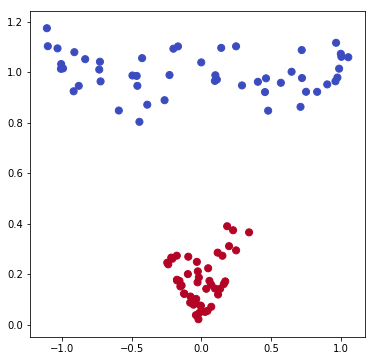

In [4]:
# plotting the data, y-axis replaced with the radius
plt.figure(figsize=[6,6])
plt.scatter(X[:, 0], r, c=y, s=50, cmap=plt.cm.coolwarm)
plt.show()

Now you can separate the two clusters by a line. So, we can perform an SVM on this transformed data.

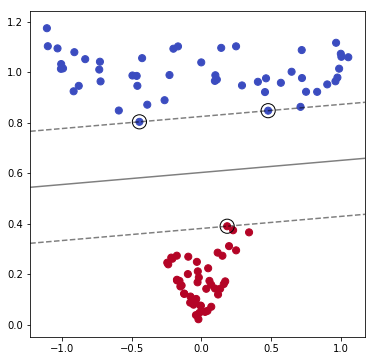

In [5]:
# SVM
R = np.vstack([X[:, 0], r]).T
sv = SVC(kernel='linear', C=10000)
sv.fit(R,y)


# plotting the margin on the SVM of the transformed data
plt.figure(figsize=[6,6])
plot_svm_margin(R,y,sv)
plt.show()

The downside of this approach is that you have to transform a feature manually. The resulting boundary also needs to be inverse transformed back to the original feature space.

To solve this issue, **`SVC`** comes with a built-in data transformation methods, known as **kernel methods**. A **kernel** is the spatial transformation from the original space to another feature space where observation clusters can be linearly separable. If you use a built-in **kernel** in `SVC`, then you don't have to worry about actually transforming the data. 

To use a kernel method, you have to specify the parameter **`kernel`** in the `SVC` object. The choices include **`rbf`** (radial basis function: similar to the radius transformation we used earlier) and **`poly`** (polynomial: a feature is expressed as a polynomial, e.g., $x^2$, $-4x^3+2x^2-0.5x+6.5$). The optimal parameters for these transformation is determined by `SVC`. Here is an example of the `rbf` kernel.

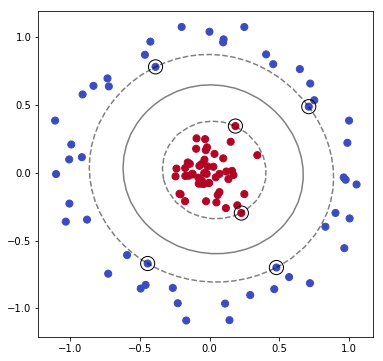

In [6]:
# SVM with RBF kernel
svRBF = SVC(kernel='rbf', C=10000)
svRBF.fit(X,y)

# plotting the margin on the SVM with the RBF kernel
plt.figure(figsize=[6,6])
plot_svm_margin(X,y,svRBF)
plt.show()

## Example: iris data with a kernel method

Recall earlier we applied an SVM to the iris data with linear boundaries. Now let's see SVMs with `rbf` and `poly` kernels. We will focus only on two of the features (sepal length and petal width) so that we can plot the decision boundaries later.

*(Here, please ignore functions `make_meshgrid` and `plot_countours`; those are functions used to visualize the decision boundaries)*

`<IrisKernelsSVM.py>`

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report



def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = np.min(x,axis=0) - 1, np.max(x,axis=0) + 1
    y_min, y_max = np.min(y,axis=0) - 1, np.max(y,axis=0) + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, x, y, h=.02, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional
    params: dictionary of params to pass to contourf, optional
    """
    xx, yy = make_meshgrid(x, y, h)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# Loading the iris data
iris = datasets.load_iris()
X = iris.data[:,[0,3]]  # sepal length and petal width only
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# spliting the data into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=2018)


The data set has been split into the training and testing data sets, with the testing data comprising 40% of observations.

First, SVM with the linear kernel, and its classification performance on the testing data.

In [24]:
# SVM on training data (Linear)
svLin = SVC(kernel='linear',C=1.0)
svLin.fit(X_train,y_train)

# Predicted classes (Linear)
y_pred_Lin = svLin.predict(X_test)

# Confusion matrix (Linear)
print(confusion_matrix(y_test,y_pred_Lin))

# classification report (Linear)
print(classification_report(y_test, y_pred_Lin,
                            target_names=target_names))

[[24  0  0]
 [ 0 18  1]
 [ 0  0 17]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        24
 versicolor       1.00      0.95      0.97        19
  virginica       0.94      1.00      0.97        17

avg / total       0.98      0.98      0.98        60



Next, the RBF kernel.

In [25]:
# SVM on training data (RBF)
svRBF = SVC(kernel='rbf',C=1.0)
svRBF.fit(X_train,y_train)

# Predicted classes (RBF)
y_pred_RBF = svRBF.predict(X_test)

# Confusion matrix (RBF)
print(confusion_matrix(y_test,y_pred_RBF))

# classification report (RBF)
print(classification_report(y_test, y_pred_RBF,
                            target_names=target_names))


[[24  0  0]
 [ 0 19  0]
 [ 0  1 16]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        24
 versicolor       0.95      1.00      0.97        19
  virginica       1.00      0.94      0.97        17

avg / total       0.98      0.98      0.98        60



And finally, the polynomial kernel.

In [26]:
# SVM on training data (Polynomial)
svPoly = SVC(kernel='poly',C=1.0)
svPoly.fit(X_train,y_train)

# Predicted classes (Polynomial)
y_pred_Poly = svPoly.predict(X_test)

# Confusion matrix (Polynomial)
print(confusion_matrix(y_test,y_pred_Poly))

# classification report (Polynomial)
print(classification_report(y_test, y_pred_Poly,
                            target_names=target_names))

[[24  0  0]
 [ 0 19  0]
 [ 0  2 15]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        24
 versicolor       0.90      1.00      0.95        19
  virginica       1.00      0.88      0.94        17

avg / total       0.97      0.97      0.97        60



Just looking at the classifier performances doesn't seem to show the difference among these methods. So, now let's take a look at the decision boundaries. 

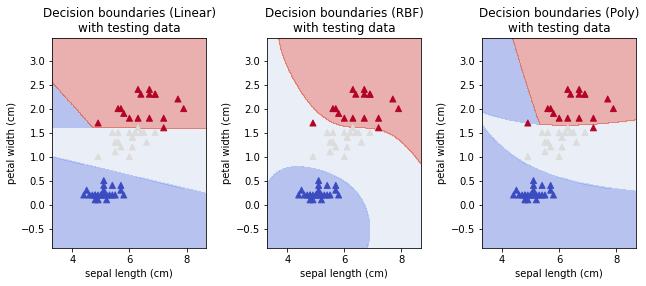

In [27]:

# plotting the boundaries and the testing data
plt.figure(figsize=[9,4])
ax = plt.subplot(131)
plot_contours(ax, svLin, X_train[:, 0], X_train[:, 1],
                  cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X_test[:,0], X_test[:,1],
            marker = '^', c=y_test,
            cmap=plt.cm.coolwarm)
plt.title('Decision boundaries (Linear)\nwith testing data')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[3])

ax = plt.subplot(132)
plot_contours(ax, svRBF, X_train[:, 0], X_train[:, 1],
                  cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X_test[:,0], X_test[:,1],
            marker = '^', c=y_test,
            cmap=plt.cm.coolwarm)
plt.title('Decision boundaries (RBF)\nwith testing data')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[3])

ax = plt.subplot(133)
plot_contours(ax, svPoly, X_train[:, 0], X_train[:, 1],
                  cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X_test[:,0], X_test[:,1],
            marker = '^', c=y_test,
            cmap=plt.cm.coolwarm)
plt.title('Decision boundaries (Poly)\nwith testing data')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[3])

plt.subplots_adjust(wspace=0.4, bottom=0.15, left=0.075, right=0.975)
plt.show()

## Example: seed data

As another example, we will examine the seed data. As you may recall, this data set consists of 210 observations with 3 classes and 7 features.

`<SeedSVM.py>`

In [28]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# loading the data 
seedData = pd.read_csv('seeds_dataset.txt', sep='\t', header=None)
seedFeatures = np.array(seedData.iloc[:,:7])
seedTargets = np.array(seedData.iloc[:,7]) - 1 # starting from zero
targetNames = ['Kama','Rosa','Canadian']

You may recall that we standardized this data set before any analysis. Standardizing a data set is a good idea for many machine learning algorithms, so we will again standardize the data. Here, before standardization, we split the data set into the training and testing data sets, with the testing data set consisting of 1/3 of all observations (or 70 observations). 

In [29]:
# splitting the data into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(seedFeatures,
                                                    seedTargets, 
                                                    test_size=70, 
                                                    random_state=0)

Then we will determine the standardization based on the training data with the **`.fit`** method.

In [30]:
# standardizing the training and testing data sets
normTrain = StandardScaler().fit(X_train)
X_train_norm = normTrain.transform(X_train)
X_test_norm = normTrain.transform(X_test)

Then this transformation is applied to both the training data and testing data. This is because we pretend as if the testing data is a new data set we haven't seen before, thus we pretend as if we do not know the mean and standard deviation either.

### Exercise
1. **Seed data SVM, rbf kernel**. Perform an SVM analysis on the standardized training data using the RBF kernel, with `C=1.0`. Then classify the standardized testing data using the resulting SVM classifier. Examine the classification performance with a confusion matrix and a classification report.
1. **Seed data SVM, poly kernel**. Perform an SVM analysis on the standardized training data using the polynomial kernel, with `C=1.0`. Then classify the standardized testing data using the resulting SVM classifier. Examine the classification performance with a confusion matrix and a classification report.